In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print('directory contents:', ', '.join(os.listdir('../datasets/deepfake-detection')))

print(
    'num train videos:', len(os.listdir('../datasets/deepfake-detection/train_sample_videos/')) - 1
)

directory contents: sample_submission.csv, test_videos, train_sample_videos
num train videos: 400


In [8]:
import cv2 as cv
from matplotlib import pyplot as plt
from tqdm import tqdm

In [7]:
train_dir = '../datasets/deepfake-detection/train_sample_videos/'
train_video_files = [train_dir + x for x in os.listdir(train_dir) if x.endswith('.mp4')]
test_dir = '../datasets/deepfake-detection/test_videos/'
test_video_files = [test_dir + x for x in os.listdir(test_dir)]

In [9]:
train_metadata = pd.read_json('../datasets/deepfake-detection/train_sample_videos/metadata.json')
train_metadata = train_metadata.T
train_metadata.head()

,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


In [10]:
train_metadata['label'].value_counts(normalize=True)

FAKE    0.8075
REAL    0.1925
Name: label, dtype: float64

In [11]:
def show_first_frame(video_files, num_to_show=25):
    root = int(num_to_show**.5)
    fig, axes = plt.subplots(root,root, figsize=(root*5,root*5))
    for i, video_file in tqdm(enumerate(video_files[:num_to_show]), total=num_to_show):
        cap = cv.VideoCapture(video_file)
        success, image = cap.read()
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        cap.release()   
        
        axes[i//root, i%root].imshow(image)
        fname = video_file.split('/')[-1]        
        try:
            label = train_metadata.loc[fname, 'label']
            axes[i//root, i%root].title.set_text(f"{fname}: {label}")
        except:
            axes[i//root, i%root].title.set_text(f"{fname}")

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:02<00:00,  9.75it/s]


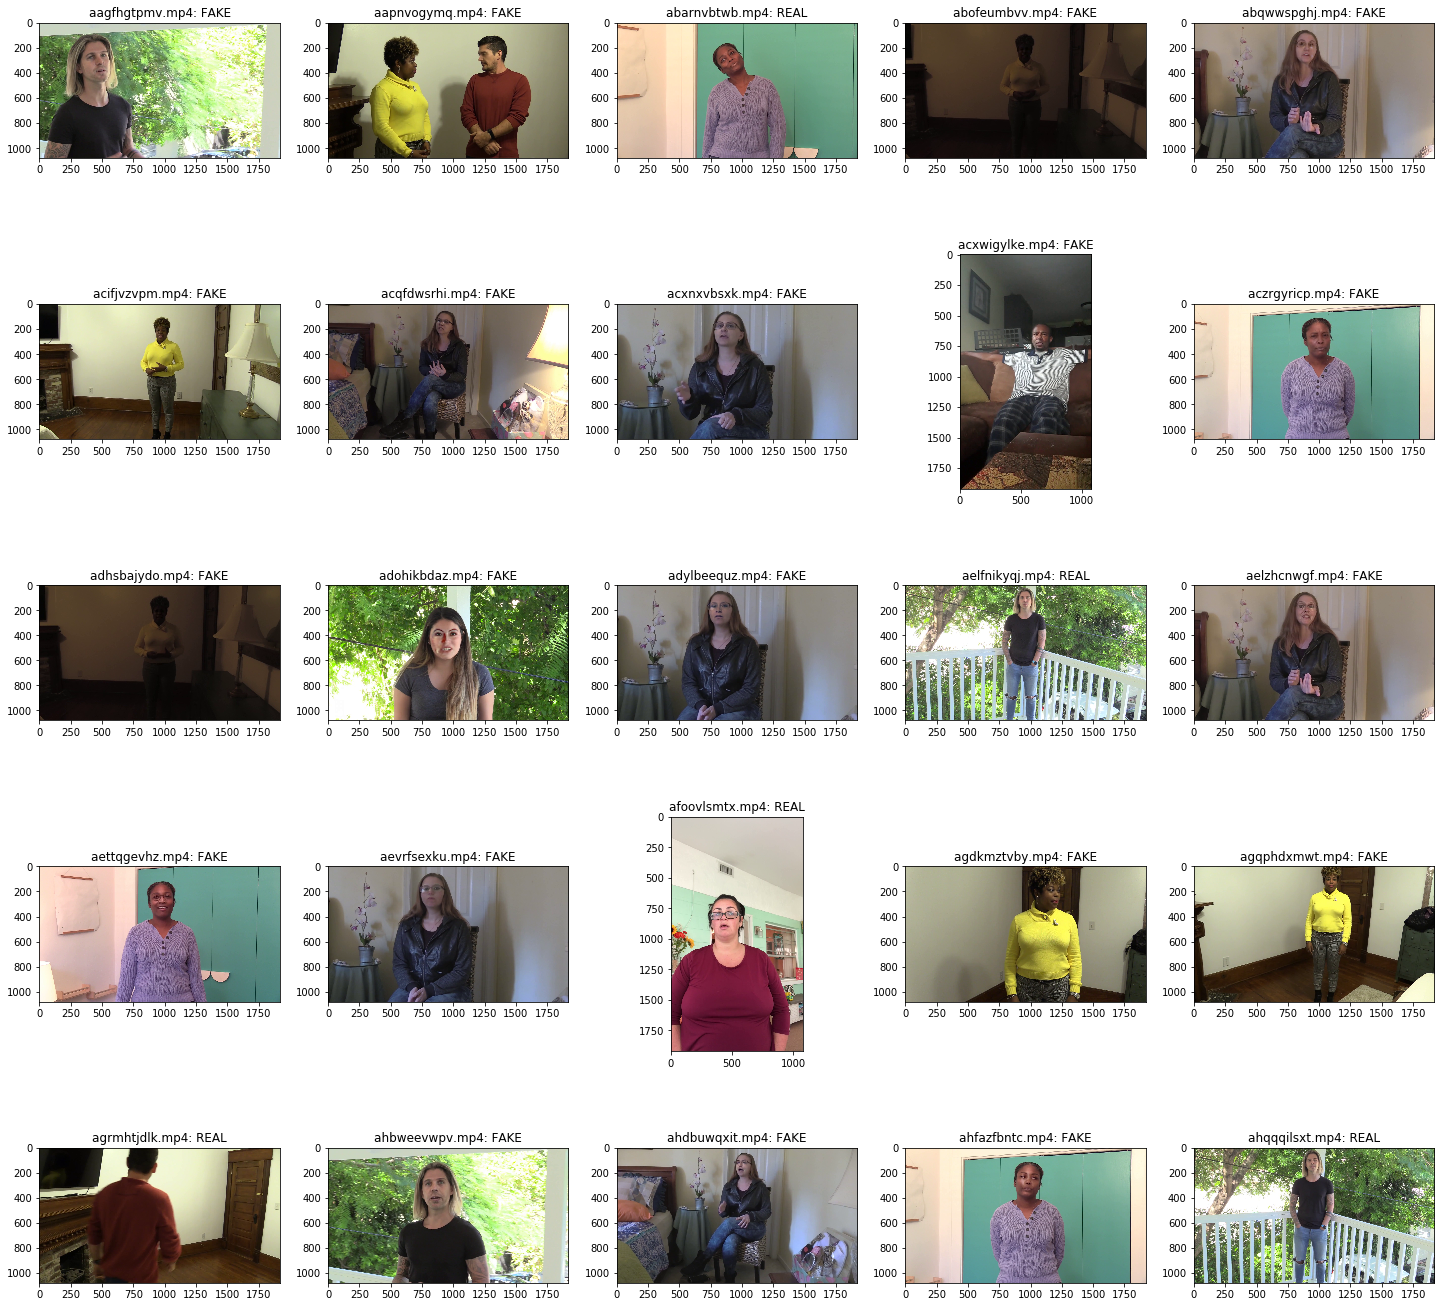

In [12]:
show_first_frame(train_video_files, num_to_show=25)